# **Import Libraries**

In [0]:
# import libraries
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader.data as web

import plotly.plotly as py
import plotly.tools as tls

import seaborn as sns; sns.set(color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

Good explenation on regression, but using statmodels instead of sklearn

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

# **Get Data**

In [0]:
# # Get Data
# # path of data
# path = "c:\\xxx\\yyy\\name.csv"
all_data = pd.read_csv('BeerConsumption_Original.csv', delimiter = ',')

In [3]:
# Choose relevant population
df = all_data.copy()       # create a copy of the data
df.index                   # index the data
df.head()

,date,temp_min,temp_med,temp_max,precipitation,weekend,consumption
0,01-01-15,23.9,27.30,32.5,0.0,0,25461
1,02-01-15,24.5,27.02,33.5,0.0,0,28972
2,03-01-15,22.4,24.82,29.9,0.0,1,30814
3,04-01-15,21.5,23.98,28.6,1.2,1,29799
4,05-01-15,21.0,23.82,28.3,0.0,0,28900


# **Prepare the Data**

In [0]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)     # transform column 'date' to date field
df['consumption'] = df['consumption'].astype(int)          # transform column 'consumption' to int field



In [5]:
df.info()            # provide information of the df columns
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
date             365 non-null datetime64[ns]
temp_min         365 non-null float64
temp_med         365 non-null float64
temp_max         365 non-null float64
precipitation    365 non-null float64
weekend          365 non-null int64
consumption      365 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.0 KB


,temp_min,temp_med,temp_max,precipitation,weekend,consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,17.461370,21.226356,26.611507,5.196712,0.284932,25401.367123
std,2.826185,3.180108,4.317366,12.417844,0.452001,4399.142703
min,10.600000,12.900000,14.500000,0.000000,0.000000,14343.000000
25%,15.300000,19.020000,23.800000,0.000000,0.000000,22008.000000
50%,17.900000,21.380000,26.900000,0.000000,0.000000,24867.000000
75%,19.600000,23.280000,29.400000,3.200000,1.000000,28631.000000
max,24.500000,28.860000,36.500000,94.800000,1.000000,37937.000000


In [0]:
df1 = df.drop(['temp_min', 'temp_med'], axis = 1)         # dropping 'temp_min' and 'temp_med' columns

In [0]:
# converting dates to days of week

# creating a temp copy of the date field for day and month conversion
df1['date_temp'] = pd.to_datetime(df1['date'])

df1['day_of_week'] = df1['date_temp'].dt.day_name()
# df1['day_of_week'] = df1['day_of_week'].replace({'Sunday': 1, 'Monday': 2, 'Tuesday':3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7})

In [0]:
# converting dates to months
df1['date_temp'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date_temp'].dt.month_name()
# df1['month'] = df1['month'].replace({'January':1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [0]:
# converting dates to days of year
df1['day_of_year'] = df1['date'].dt.dayofyear

In [0]:
# delete date field
df1 = df1.drop('date', axis = 1)

In [0]:
# ordering the data so consumption is the last columns (standard practice)
cols = ['day_of_year', 'month', 'day_of_week', 'temp_max', 'precipitation', 'weekend', 'consumption']
df1 = df1[cols]

In [12]:
df1.head()

,day_of_year,month,day_of_week,temp_max,precipitation,weekend,consumption
0,1,January,Thursday,32.5,0.0,0,25461
1,2,January,Friday,33.5,0.0,0,28972
2,3,January,Saturday,29.9,0.0,1,30814
3,4,January,Sunday,28.6,1.2,1,29799
4,5,January,Monday,28.3,0.0,0,28900


In [0]:
# categorizing precipitation 0-5mm and above 5mm
cat = 5
def preciptation_cat(row):
  if row['precipitation'] < cat:
    return 0
  else:
    return 1

df1['precip_cat'] = df1.apply(preciptation_cat, axis = 1)

# dropping precipitation column
# df1 = df1.drop('precipitation', axis = 1)

In [0]:
# ordering the data so consumption is the last columns (standard practice)
cols = ['day_of_year', 'month', 'day_of_week', 'temp_max', 'precipitation','precip_cat', 'weekend', 'consumption']
df1 = df1[cols]

In [15]:
df1.head()

,day_of_year,month,day_of_week,temp_max,precipitation,precip_cat,weekend,consumption
0,1,January,Thursday,32.5,0.0,0,0,25461
1,2,January,Friday,33.5,0.0,0,0,28972
2,3,January,Saturday,29.9,0.0,0,1,30814
3,4,January,Sunday,28.6,1.2,0,1,29799
4,5,January,Monday,28.3,0.0,0,0,28900


In [16]:
df1_dummies = pd.get_dummies(df1, drop_first=False) # drop_first=True is used so to drop the dependence of the first and the others
df1_dummies.head()

,day_of_year,temp_max,precipitation,precip_cat,weekend,consumption,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1,32.5,0.0,0,0,25461,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,33.5,0.0,0,0,28972,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,29.9,0.0,0,1,30814,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,28.6,1.2,0,1,29799,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,28.3,0.0,0,0,28900,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Split the Data and Fit the Model**

Feature Engineering with time (month, day) dummy variables

In [0]:
cols = ['day_of_year'           ,
        'temp_max'              , 
        'precipitation'         , 
        'precip_cat'            , 
        'weekend'               ,
        'month_January'         ,
        'month_February'        ,
        'month_March'           , 
        'month_April'           , 
        'month_May'             , 
        'month_June'            ,
        'month_July'            , 
        'month_August'          ,
        'month_September'       ,
        'month_October'         ,
        'month_November'        , 
        'month_December'        ,
        'day_of_week_Monday'    ,
        'day_of_week_Tuesday'   , 
        'day_of_week_Wednesday' ,
        'day_of_week_Thursday'  ,
        'day_of_week_Friday'    , 
        'day_of_week_Saturday'  , 
        'day_of_week_Sunday'    , 
        'consumption']
df2 = df1_dummies[cols]

In [18]:
df2.head()

,day_of_year,temp_max,precipitation,precip_cat,weekend,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,consumption
0,1,32.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25461
1,2,33.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,28972
2,3,29.9,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30814
3,4,28.6,1.2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29799
4,5,28.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,28900


In [0]:
# Choosing features for model
cols = ['day_of_year'           ,
        'temp_max'              , 
        'precipitation'         , 
        'weekend'               ,
        'month_January'         ,
        'month_February'        ,
        'month_March'           , 
        'month_April'           , 
        'month_May'             , 
        'month_June'            ,
        'month_July'            , 
        'month_August'          ,
        'month_September'       ,
        'month_October'         ,
        'month_November'        , 
        'month_December'        ,
        'day_of_week_Monday'    ,
        'day_of_week_Tuesday'   , 
        'day_of_week_Wednesday' ,
        'day_of_week_Thursday'  ,
        'day_of_week_Friday'    , 
        'day_of_week_Saturday'  , 
        'day_of_week_Sunday'    , 
        'consumption']
df3 = df1_dummies[cols]

In [0]:
# split data
# df_train, df_test = split(df2, train_size = 0.7, random_state=123456)
df_train, df_test = split(df3, train_size = 0.7, random_state=123456)

In [0]:
# Define X and y
# Fit model
X = df_train.drop(['consumption'], axis = 1)
y = df_train['consumption']

df_lm = LinearRegression().fit(X,y)


In [22]:
# create equasion string

def lm_equasion(model,X):
  
  feature_num = X.shape[1]
  equasion = 'y = ' + '{:.2f}'.format(model.intercept_)

  for coef, feature in zip(model.coef_, df_train.columns[:feature_num]):
    equasion += '{:+.2f}*{}'.format(coef, feature)
    
  return equasion

lm_equasion(df_lm, X)



'y = 7530.40+11.75*day_of_year+571.56*temp_max-56.29*precipitation+2852.70*weekend+2076.75*month_January+616.13*month_February+1038.86*month_March+626.82*month_April-538.18*month_May+631.34*month_June-1263.20*month_July+111.69*month_August-707.01*month_September+25.94*month_October-1488.73*month_November-1130.42*month_December-613.50*day_of_week_Monday-203.60*day_of_week_Tuesday-1044.30*day_of_week_Wednesday-80.92*day_of_week_Thursday-910.38*day_of_week_Friday+1333.02*day_of_week_Saturday+1519.68*day_of_week_Sunday'

**Important**

Statistical inference is not included in sklearn.linear_model

It is supported in statmodels library

# **Apply model and visualize**

In [23]:
# create predicted values from linear regression model
df_train['consumption_pred'] = df_lm.predict(X).round(2)
# df_train['consumption_pred'] = round(df_train['consumption_pred'], 2)
df_train.head()


,day_of_year,temp_max,precipitation,weekend,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,consumption,consumption_pred
38,39,29.5,10.4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29926,29252.66
124,125,20.8,9.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21826,19588.41
85,86,30.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24974,26273.33
7,8,32.8,48.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,28397,25631.49
283,284,30.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,34496,32412.33


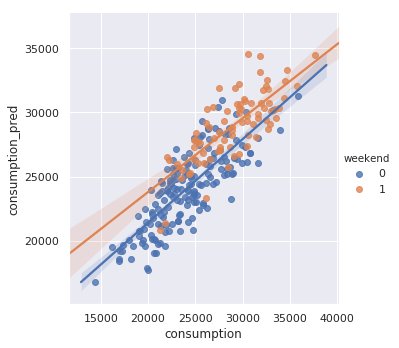

In [24]:
# visualize observed vs predicted consumption
x = df_train['consumption']
y = df_train['consumption_pred']

sns.lmplot(x="consumption", y="consumption_pred", hue="weekend", data=df_train)


In [0]:
# CREATE A RESIDUAL PLOT
df_train['lm_residual'] = df_train['consumption'] - df_train['consumption_pred']

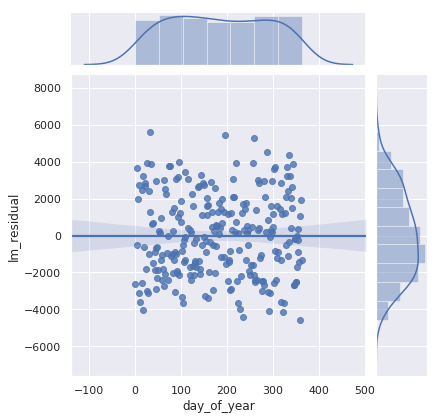

In [26]:
x = df_train['day_of_year']
y = df_train['lm_residual']

g = sns.jointplot(x = x, y = y, data=df3, kind="reg")

# **Assess the Model**

In [27]:
# get the rmse
df_rmse_train = np.sqrt(MSE(df_train['consumption'], 
                         df_train['consumption_pred']))
print ("RMSE = {:.2f}".format(df_rmse_train))

RMSE = 2218.84


# **Validate the Model**

In [28]:
# apply model to test data

df_train.head()


,day_of_year,temp_max,precipitation,weekend,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,consumption,consumption_pred,lm_residual
38,39,29.5,10.4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29926,29252.66,673.34
124,125,20.8,9.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21826,19588.41,2237.59
85,86,30.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24974,26273.33,-1299.33
7,8,32.8,48.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,28397,25631.49,2765.51
283,284,30.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,34496,32412.33,2083.67


In [29]:
df_test.head()

,day_of_year,temp_max,precipitation,weekend,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,consumption
200,201,25.1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,20620
41,42,30.4,2.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,26805
9,10,34.2,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37937
36,37,25.4,18.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,22821
364,365,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,22446


In [30]:
X = df_test.drop(['consumption'], axis = 1)
y = df_test['consumption']


df_test['consumption_pred'] = df_lm.predict(X)
df_test.head()

,day_of_year,temp_max,precipitation,weekend,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,consumption,consumption_pred
200,201,25.1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,20620,22361.470671
41,42,30.4,2.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,26805,24847.225170
9,10,34.2,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37937,33457.657663
36,37,25.4,18.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,22821,21152.661455
364,365,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,22446,27182.828154


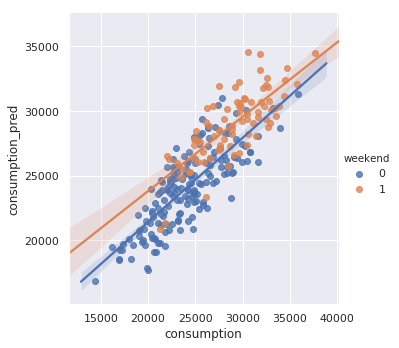

In [31]:
# differentiator: weekend

x = df_test['consumption']
y = df_test['consumption_pred']

sns.lmplot(x="consumption", y="consumption_pred", hue="weekend", data=df_train)

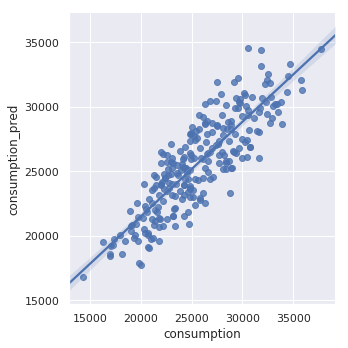

In [32]:
# differentiator: precipitation category

x = df_test['consumption']
y = df_test['consumption_pred']

# sns.lmplot(x="consumption", y="consumption_pred", hue="precip_cat", data=df_train)
sns.lmplot(x="consumption", y="consumption_pred", data=df_train)

In [0]:
# CREATE A RESIDUAL PLOT
df_test['lm_residual'] = df_test['consumption'] - df_test['consumption_pred']

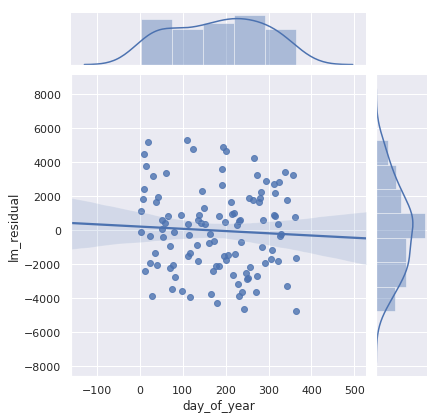

In [34]:
x = df_test['day_of_year']
y = df_test['lm_residual']

g = sns.jointplot(x = x, y = y, data=df1, kind="reg")

In [35]:
# Calculate RMSE on Test data
df_rmse_test = np.sqrt(MSE(df_test['consumption'], 
                         df_test['consumption_pred']))
print ("RMSE = {:.2f}".format(df_rmse_test))

RMSE = 2436.97


In [36]:
print(round(df_rmse_train,2), round(df_rmse_test,2))

2218.84 2436.97
